In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv('../data/cleaning_data_phase2.csv.zip')


In [4]:
df.head()

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,...,_metstat,_imprace,_age80,_educag,ftjuda2_,frutda2_,grenda1_,frnchda_,potada1_,vegeda2_
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,...,yes,white,70.0,highschool,5.397605e-79,100.0,5.700000e+01,4.300000e+01,14.0,100.0
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,...,yes,black,67.0,graduated college,5.397605e-79,100.0,1.400000e+01,5.397605e-79,14.0,100.0
2,Yes,Female,Very good,0.0,0.0,No,Within past year (anytime < 12 months ago),No physical activity or exercise in last 30 days,Yes,No,...,yes,black,72.0,highschool,5.397605e-79,100.0,5.397605e-79,1.400000e+01,14.0,43.0
3,No,Female,Very good,0.0,10.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,No,...,yes,white,62.0,highschool,7.100000e+01,43.0,1.000000e+01,5.700000e+01,27.0,71.0
4,Yes,Male,Poor,30.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,No,Yes,...,no,other race,76.0,no highschool,5.397605e-79,100.0,1.000000e+02,2.900000e+01,29.0,100.0


In [5]:
columns_mark = ['_michd','chccopd3', 'chckdny2', 'diabete4', '_drdxar3', 'marital', 'children',
       '_incomg1', 'employ1', 'htm4', 'wtkg3', '_bmi5', 'decide', 'diffwalk',
       'diffdres', '_state']
df_mark = df[columns_mark]

In [6]:
df_mark

,_michd,chccopd3,chckdny2,diabete4,_drdxar3,marital,children,_incomg1,employ1,htm4,wtkg3,_bmi5,decide,diffwalk,diffdres,_state
0,No,yes,no,no,yes,married,0.0,25k_35k,retired,150.0,3266.0,1454.0,no,no,no,Alabama
1,Yes,no,yes,yes,yes,refused,0.0,unknown,unable_to_work,168.0,NaN,NaN,yes,yes,no,Alabama
2,Yes,no,no,yes,no,widowed,0.0,15k_25k,retired,165.0,7711.0,2829.0,no,no,no,Alabama
3,No,no,no,yes,no,married,0.0,50k_100k,retired,163.0,8845.0,3347.0,no,no,no,Alabama
4,Yes,no,no,yes,no,married,0.0,15k_25k,unable_to_work,180.0,9344.0,2873.0,no,yes,no,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414506,No,yes,no,yes_told_during_pregnancy,no,never_married,1.0,25k_35k,employed_for_wages,157.0,6123.0,2469.0,no,no,no,Virgin Islands
414507,No,no,no,yes,no,widowed,0.0,less_15k,unable_to_work,157.0,NaN,NaN,yes,no,no,Virgin Islands
414508,No,no,no,no,not sure,married,0.0,100k_200k,retired,180.0,9979.0,3068.0,no,no,no,Virgin Islands
414509,No,no,no,no,no,divorced,0.0,35k_50k,retired,183.0,7938.0,2373.0,no,no,no,Virgin Islands


<Axes: >

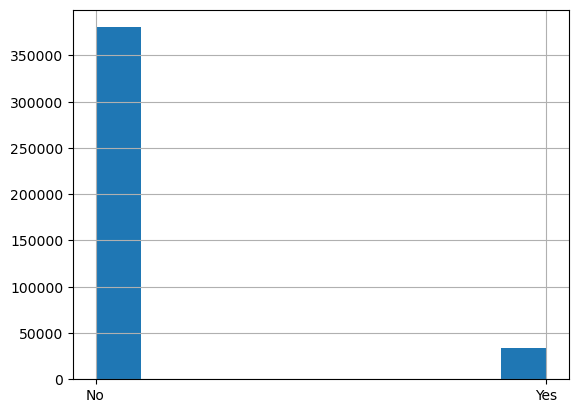

In [7]:
df_mark['_michd'].hist()
#Imbalanced Classes

In [8]:
df_mark['_michd'] = df_mark['_michd'].map(lambda x: 1 if x == 'Yes' else 0)

/var/folders/qb/hyjcthl17f3gh9hb8cf0jrbm0000gn/T/ipykernel_9100/3457649111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark['_michd'] = df_mark['_michd'].map(lambda x: 1 if x == 'Yes' else 0)


In [9]:
def get_yes_proportion(column, n = 10):
    df_grouped = df_mark.groupby(column)['_michd'].mean().reset_index()
    df_grouped.rename(columns = {'_michd': '_michd%'},inplace = True)
    df_grouped.sort_values('_michd%', inplace=True)
    df_grouped = df_grouped.head(n)
    plt.scatter(df_grouped[column],df_grouped['_michd%'])
    plt.xticks(rotation = 45)
    plt.ylim(0,.3)

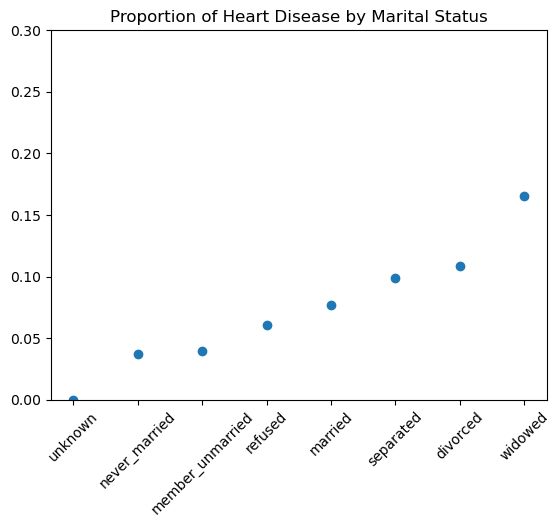

In [10]:
get_yes_proportion('marital')
plt.title('Proportion of Heart Disease by Marital Status');

Being widowed, divorced, or seperated is correlated with a higher chance of heart disease.

Unknown,Never married, or unmarried have the lowest correlations with heart disease.

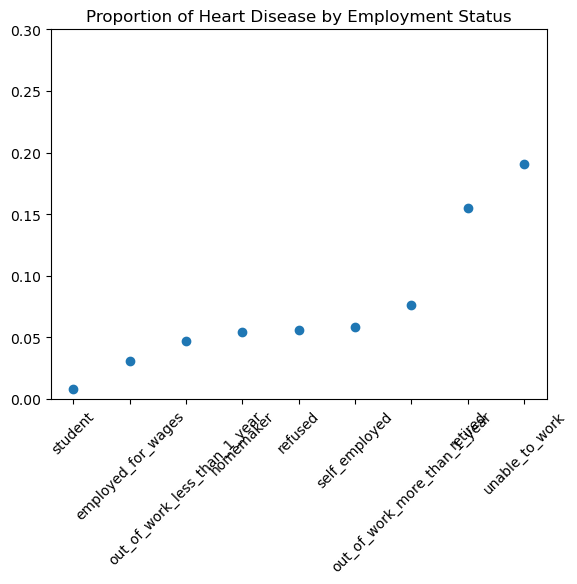

In [11]:
get_yes_proportion('employ1')
plt.title('Proportion of Heart Disease by Employment Status');

The unable to work and retired groups have a higher correlation with the target variable. This indicates that the higher the age, the higher the percentage chance of heart disease.

In [12]:
df_mark.columns

Index(['_michd', 'chccopd3', 'chckdny2', 'diabete4', '_drdxar3', 'marital',
       'children', '_incomg1', 'employ1', 'htm4', 'wtkg3', '_bmi5', 'decide',
       'diffwalk', 'diffdres', '_state'],
      dtype='object')

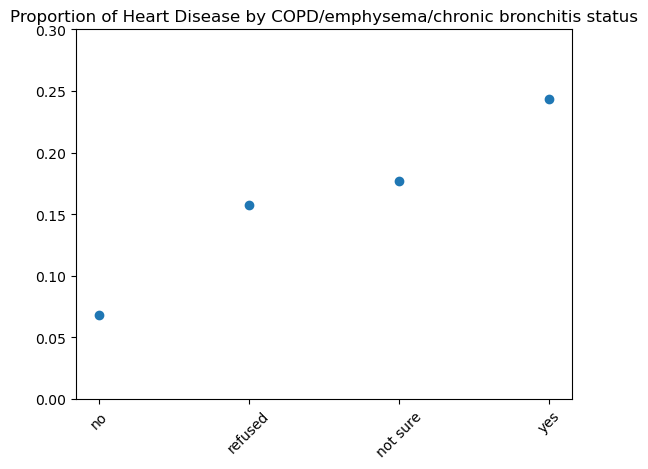

In [13]:
get_yes_proportion('chccopd3')
plt.title('Proportion of Heart Disease by COPD/emphysema/chronic bronchitis status');

COPD (Chronic Obstructive Pulmonary Disease), emphysema, or chronic bronchitis is correlated with having heart disease.

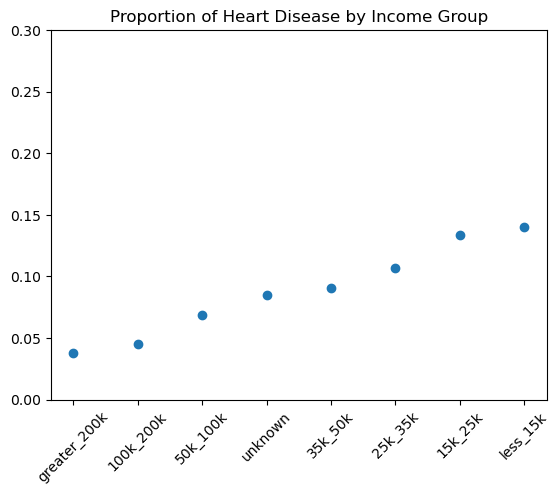

In [14]:
get_yes_proportion('_incomg1')
plt.title('Proportion of Heart Disease by Income Group');

This is a great graph! High income is negatively correlated with heart disease, while low income is positively correlated with heart disease.

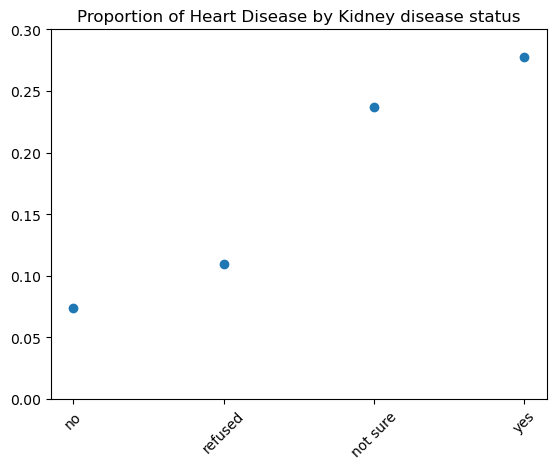

In [15]:
get_yes_proportion('chckdny2')
plt.title('Proportion of Heart Disease by Kidney disease status');

Kidney Disease is correlated with having heart disease

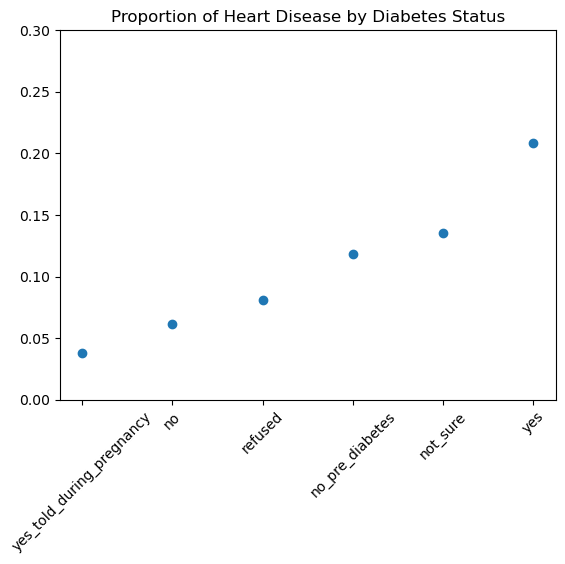

In [16]:
get_yes_proportion('diabete4')
plt.title('Proportion of Heart Disease by Diabetes Status');

Again, yes is correlated with having heart disease. Interestingly, the answer 'not sure' has had a higher proportion of heart disease than 'refused' for the past 3 graphs. 

yes_told_during_pregnancy has a very low correlation with heart disease

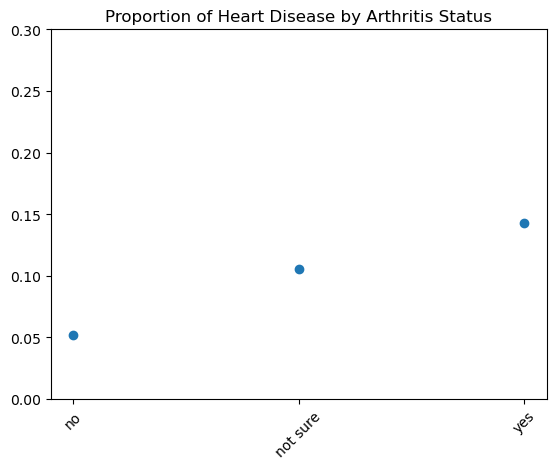

In [17]:
get_yes_proportion('_drdxar3')
plt.title('Proportion of Heart Disease by Arthritis Status');

Again, being told that you have arthritis is correlated with Heart Disease

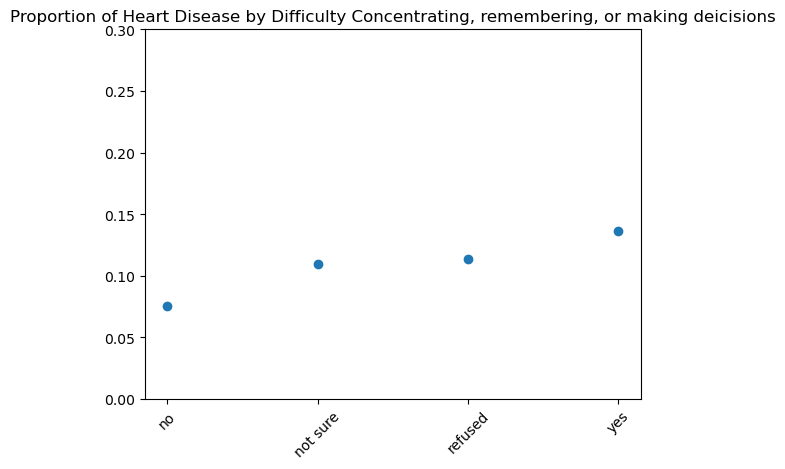

In [18]:
get_yes_proportion('decide')
plt.title('Proportion of Heart Disease by Difficulty Concentrating, remembering, or making deicisions');

In [19]:
df_mark.columns

Index(['_michd', 'chccopd3', 'chckdny2', 'diabete4', '_drdxar3', 'marital',
       'children', '_incomg1', 'employ1', 'htm4', 'wtkg3', '_bmi5', 'decide',
       'diffwalk', 'diffdres', '_state'],
      dtype='object')

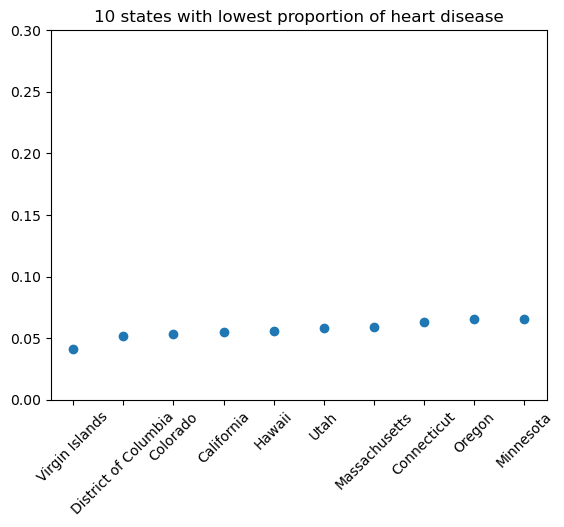

In [20]:
get_yes_proportion('_state')
plt.title('10 states with lowest proportion of heart disease');

Modifying this code to see the highest 10 states

In [21]:
def get_yes_proportion_highest(column, n = 10):
    df_grouped = df_mark.groupby(column)['_michd'].mean().reset_index()
    df_grouped.rename(columns = {'_michd': '_michd%'},inplace = True)
    df_grouped.sort_values('_michd%', inplace=True)
    df_grouped = df_grouped.tail(n)
    plt.scatter(df_grouped[column],df_grouped['_michd%'])
    plt.xticks(rotation = 45)
    plt.ylim(0,.3)

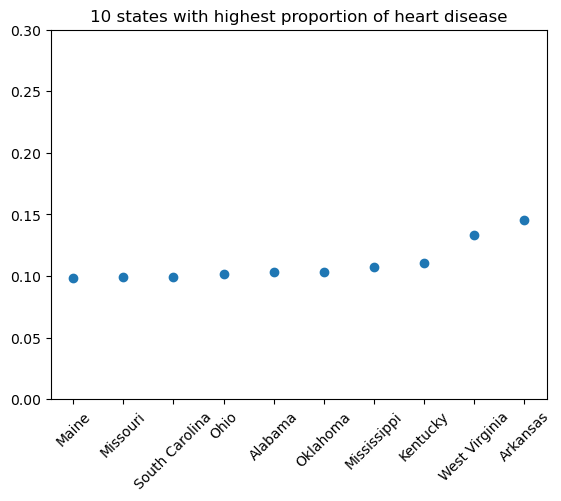

In [22]:
get_yes_proportion_highest('_state')
plt.title('10 states with highest proportion of heart disease');

In [23]:
df_mark.columns

Index(['_michd', 'chccopd3', 'chckdny2', 'diabete4', '_drdxar3', 'marital',
       'children', '_incomg1', 'employ1', 'htm4', 'wtkg3', '_bmi5', 'decide',
       'diffwalk', 'diffdres', '_state'],
      dtype='object')

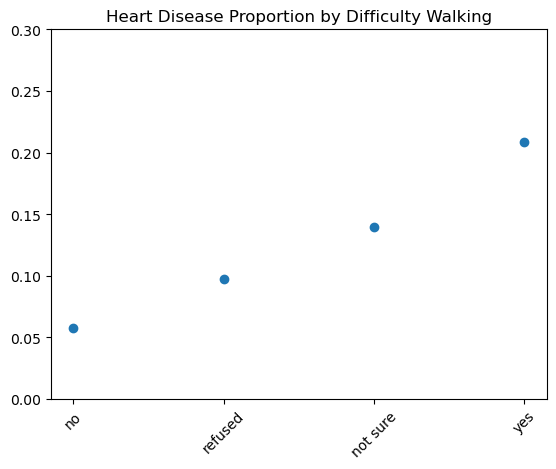

In [24]:
get_yes_proportion('diffwalk')
plt.title('Heart Disease Proportion by Difficulty Walking');

Difficulty Walking is correlated with having heart disease

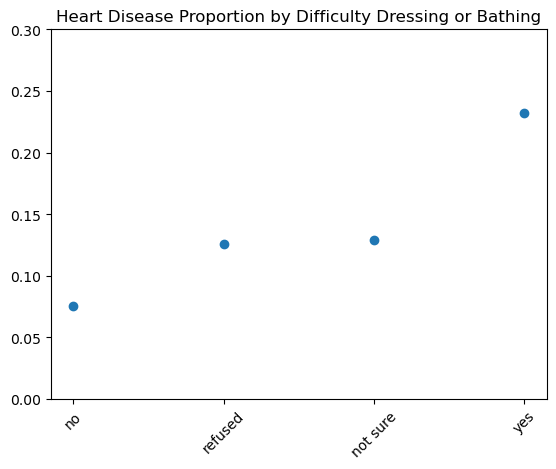

In [25]:
get_yes_proportion('diffdres')
plt.title('Heart Disease Proportion by Difficulty Dressing or Bathing');

Difficulty Dressing or Bathing is correlated with having heart disease

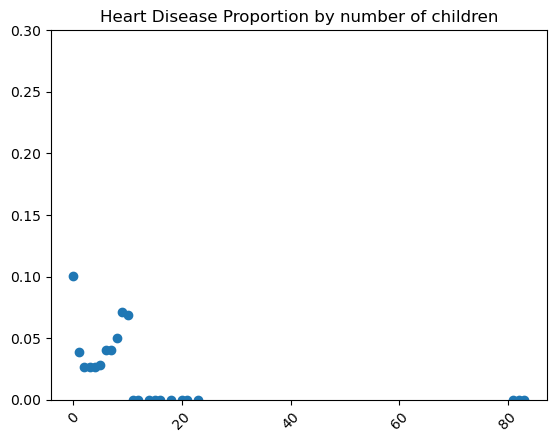

In [26]:
get_yes_proportion('children',n = 50)
plt.title('Heart Disease Proportion by number of children');

This graph is meaningless

In [27]:
df_mark.columns

Index(['_michd', 'chccopd3', 'chckdny2', 'diabete4', '_drdxar3', 'marital',
       'children', '_incomg1', 'employ1', 'htm4', 'wtkg3', '_bmi5', 'decide',
       'diffwalk', 'diffdres', '_state'],
      dtype='object')

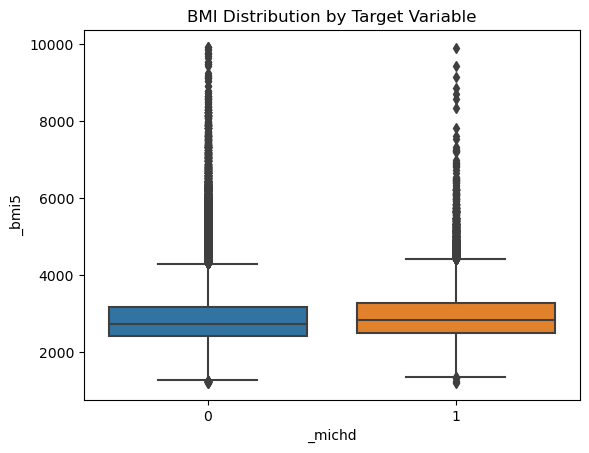

In [28]:
sns.boxplot(x='_michd', y='_bmi5', data=df_mark)
plt.title('BMI Distribution by Target Variable')
plt.show()

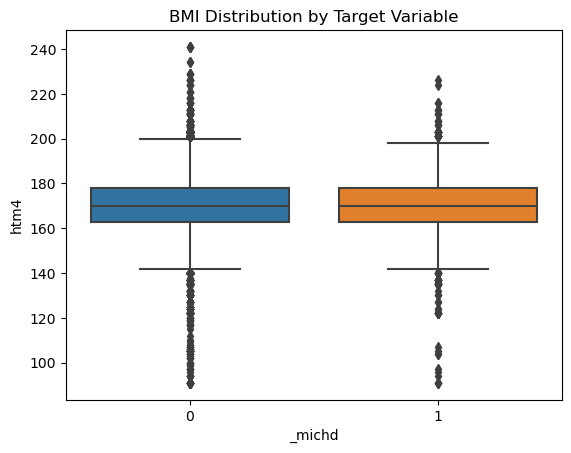

In [29]:
sns.boxplot(x='_michd', y='htm4', data=df_mark)
plt.title('BMI Distribution by Target Variable')
plt.show()

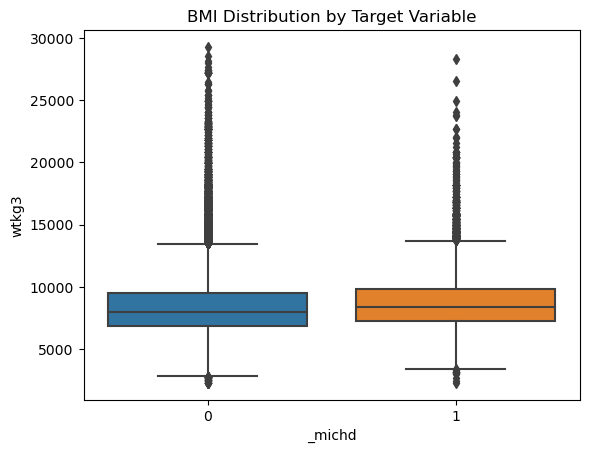

In [30]:
sns.boxplot(x='_michd', y='wtkg3', data=df_mark)
plt.title('BMI Distribution by Target Variable')
plt.show()

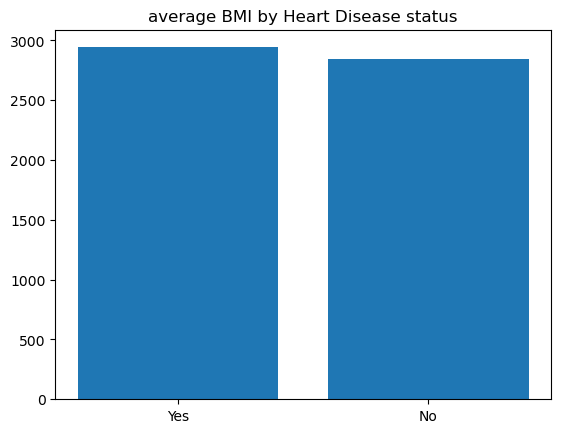

In [31]:
average_yes = df_mark[df_mark['_michd'] == 1]['_bmi5'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['_bmi5'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('average BMI by Heart Disease status');

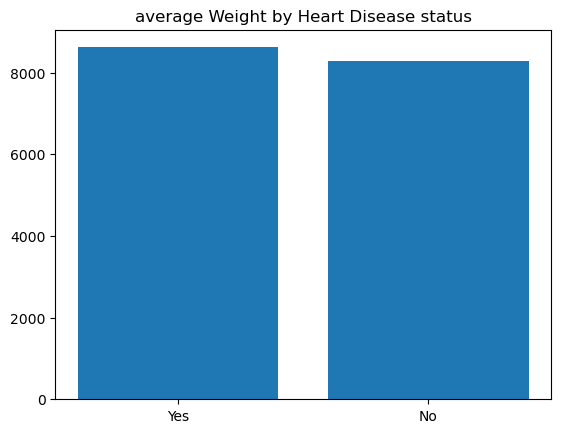

In [32]:
average_yes = df_mark[df_mark['_michd'] == 1]['wtkg3'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['wtkg3'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('average Weight by Heart Disease status');

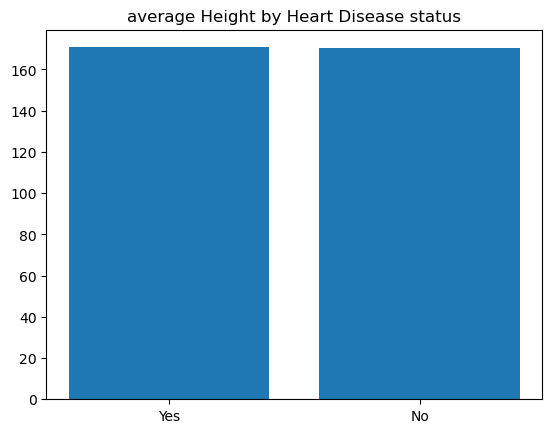

In [33]:
average_yes = df_mark[df_mark['_michd'] == 1]['htm4'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['htm4'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('average Height by Heart Disease status');

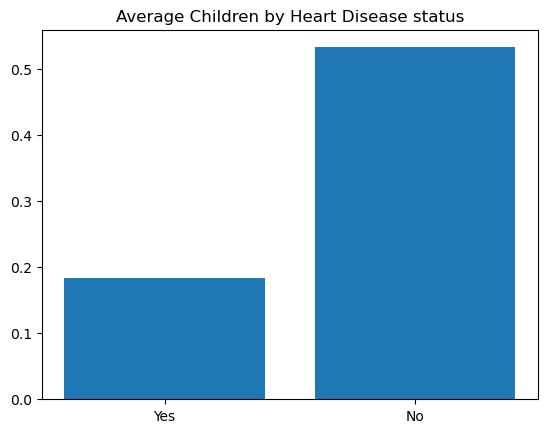

In [34]:
average_yes = df_mark[df_mark['_michd'] == 1]['children'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['children'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('Average Children by Heart Disease status');